In [106]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt  
sns.set()

In [107]:
import matplotlib.pyplot as plt
print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [108]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [109]:
df  =pd.DataFrame(housing.data, columns=housing.feature_names)
df['target']= housing.target
df.to_csv('california_housing.csv', index = False)

In [110]:
housing.DESCR

'.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n:Number of Instances: 20640\n\n:Number of Attributes: 8 numeric, predictive attributes and the target\n\n:Attribute Information:\n    - MedInc        median income in block group\n    - HouseAge      median house age in block group\n    - AveRooms      average number of rooms per household\n    - AveBedrms     average number of bedrooms per household\n    - Population    block group population\n    - AveOccup      average number of household members\n    - Latitude      block group latitude\n    - Longitude     block group longitude\n\n:Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttps://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html\n\nThe target variable is the median house value for California districts,\nexpressed in hundreds of thousands of dollars ($100,000).\n\nThis dataset was derived from the 1990 U.S

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [112]:
df = pd.read_csv('california_housing.csv')

In [113]:
df.shape

(20640, 9)

In [114]:
df.dtypes

MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
target        float64
dtype: object

In [115]:

df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

convert pandas into numpy

In [116]:
Y = df[['target']].to_numpy()
X = df[housing.feature_names].to_numpy()
print(X.shape)
print(Y.shape)

(20640, 8)
(20640, 1)


In [117]:
X.shape

(20640, 8)

In [118]:
df.shape

(20640, 9)

In [119]:
 # Initialize weights

weights  =np.ones(shape= (X.shape[1],1))
weights.shape

(8, 1)

In [120]:
weights

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [121]:
#dot product of the predictions and its weights and the number of x values must match the number of weights in order to do dot product

all_predictions  = X @ weights
all_predictions[0:10]

array([[ 297.53869206],
       [2355.2612594 ],
       [ 483.03124181],
       [ 540.68145616],
       [ 545.99060154],
       [ 392.64198135],
       [1073.26077315],
       [1135.35760433],
       [1173.09905546],
       [1530.41425322]])

In [122]:
X.shape

(20640, 8)

In [123]:
weights.shape

(8, 1)

# Gradient descent
bu aşamada:

* calculate loss function with respect to each weight

*  2.update each weight


In [ ]:
import numpy as np

class LinearRegression():
    def __init__(self, max_iter=10000, learning_rate=0.001, tolerance=0.0001, fit_intercept= True):
        self._weights = None
        self._max_iter = max_iter   
        self._learning_rate = learning_rate
        self._tolerance = tolerance
        self._fit_intercept = fit_intercept
        self._loss_function = loss_function

    def _init_weights(self, num_features):  
        self._weights = np.random.normal(size=(num_features, 1))

    def fit(self, X, Y):
        assert len(X) == len(Y), "X and Y should be same length"
        if self._fit_intercept:
            X = np.concatenate((X, np.ones(shape=(len(X),1))), axis=1)


        self._init_weights(X.shape[1])

        loss_history = []
        previous_loss = np.inf 
        converged = False

        for i in range(self._max_iter):
            Y_pred = self.predict(X)
            loss = self.mean_squared_loss(Y, Y_pred)
            print(f"Iteration {i}, Loss: {loss}")

            # Debug print for gradient
            partial_derivative = self.mean_squared_loss_derivative(X, Y, Y_pred)
            print("Partial derivative:", partial_derivative)

            # Check convergence before updating
            if np.abs(loss - previous_loss) < self._tolerance:
                converged = True
                break

            loss_history.append(loss)
            # Correct weight update:
            self._weights = self._weights - self._learning_rate * partial_derivative

            previous_loss = loss

        if converged:
            print("Model converged")
        else:
            print("Max iteration reached, model not converged")

    def predict(self, X):
        return X @ self._weights         

    @staticmethod
    def mean_squared_loss(Y, Y_pred):
        return np.mean((Y - Y_pred) ** 2)
    
    def mean_squared_loss_derivative(self, X, Y, Y_pred):
        return (-X.T @ (Y - Y_pred)) / len(X)


# Preprocess data

In [131]:
from sklearn.preprocessing import StandardScaler

In [132]:
Y = df[['target']].to_numpy()
X = df[housing.feature_names].to_numpy()
scaler = StandardScaler()
X = scaler.fit_transform(X)
print(X.shape)
print(Y.shape)

(20640, 8)
(20640, 1)


In [133]:
Regressor = LinearRegression(max_iter=10000, learning_rate=0.001, tolerance=0.0001)
Regressor.fit(X,Y)

Iteration 0, Loss: 14.148145796529873
Partial derivative: [[-2.51550995]
 [ 0.40528755]
 [ 0.25318468]
 [ 1.41378278]
 [ 0.89212346]
 [-0.7806069 ]
 [-0.0808416 ]
 [ 0.39462244]
 [-1.91508419]]
Iteration 1, Loss: 14.120580036265869
Partial derivative: [[-2.51293138]
 [ 0.40504974]
 [ 0.25269767]
 [ 1.41208444]
 [ 0.8914818 ]
 [-0.77983758]
 [-0.08062777]
 [ 0.39405977]
 [-1.91316911]]
Iteration 2, Loss: 14.09307096474553
Partial derivative: [[-2.51035536]
 [ 0.40481201]
 [ 0.25221164]
 [ 1.41038831]
 [ 0.89084058]
 [-0.77906903]
 [-0.08041436]
 [ 0.39349794]
 [-1.91125594]]
Iteration 3, Loss: 14.06561846327554
Partial derivative: [[-2.5077819 ]
 [ 0.40457435]
 [ 0.25172656]
 [ 1.40869439]
 [ 0.8901998 ]
 [-0.77830127]
 [-0.08020138]
 [ 0.39293696]
 [-1.90934469]]
Iteration 4, Loss: 14.038222413417119
Partial derivative: [[-2.50521099]
 [ 0.40433676]
 [ 0.25124245]
 [ 1.40700266]
 [ 0.88955945]
 [-0.77753429]
 [-0.07998882]
 [ 0.39237683]
 [-1.90743534]]
Iteration 5, Loss: 14.0108826969

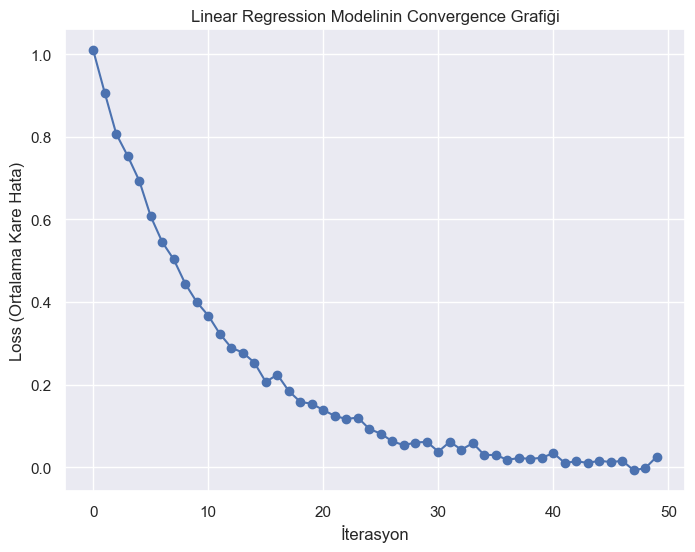

In [134]:
import matplotlib.pyplot as plt
import numpy as np

# Örnek: loss değerlerini simüle ediyoruz (örneğin, üstel bir azalma)
iterations = np.arange(0, 50)
# Basit bir üstel azalma ve küçük bir rastlantısallık ekleyelim
loss_values = np.exp(-0.1 * iterations) + np.random.normal(0, 0.01, size=len(iterations))

plt.figure(figsize=(8,6))
plt.plot(iterations, loss_values, marker='o', linestyle='-')
plt.xlabel('İterasyon')
plt.ylabel('Loss (Ortalama Kare Hata)')
plt.title('Linear Regression Modelinin Convergence Grafiği')
plt.grid(True)
plt.show()
